In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bestsellers.csv to bestsellers.csv


###Cleaning a Data

In [ ]:
bestseller = pd.read_csv('bestsellers.csv')
bestseller.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction,Non Fiction
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction,Fiction


In [ ]:
bestseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         347 non-null    object 
 1   Author       347 non-null    object 
 2   User Rating  347 non-null    float64
 3   Reviews      347 non-null    float64
 4   Price        347 non-null    float64
 5   Year         347 non-null    float64
 6   Genre        347 non-null    object 
 7   Type         347 non-null    object 
dtypes: float64(4), object(4)
memory usage: 23.6+ KB


In [ ]:
bestseller.isnull().sum()

Name           28
Author         28
User Rating    28
Reviews        28
Price          28
Year           28
Genre          28
Type           28
dtype: int64

In [ ]:
bestseller[bestseller.isna()]

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bestseller=bestseller.dropna()
bestseller.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Type           0
dtype: int64

In [ ]:
bestseller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 374
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         347 non-null    object 
 1   Author       347 non-null    object 
 2   User Rating  347 non-null    float64
 3   Reviews      347 non-null    float64
 4   Price        347 non-null    float64
 5   Year         347 non-null    float64
 6   Genre        347 non-null    object 
 7   Type         347 non-null    object 
dtypes: float64(4), object(4)
memory usage: 24.4+ KB


In [ ]:
bestseller['Year']=bestseller['Year'].astype(str)

In [ ]:
bestseller.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction,Non Fiction
2,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction,Fiction
5,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,12.0,2019.0,Non Fiction,Non Fiction


###Reviews Each Year

In [ ]:
bestseller_review = bestseller.groupby('Year', as_index = False).agg({'Reviews':'sum'})
bestseller_review

,Year,Reviews
0,2009.0,205181.0
1,2010.0,208384.0
2,2011.0,145906.0
3,2012.0,326838.0
4,2013.0,372387.0
5,2014.0,309002.0
6,2015.0,345897.0
7,2016.0,271969.0
8,2017.0,273327.0
9,2018.0,454441.0


###Are the number of reviews increasing each year?

<function matplotlib.pyplot.show(*args, **kw)>

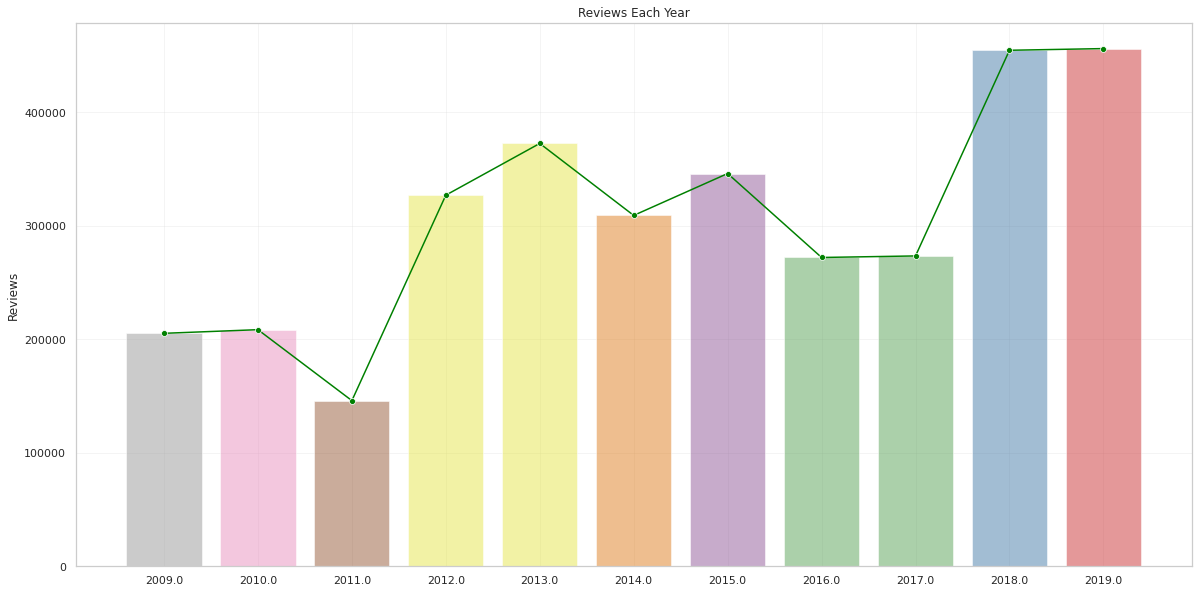

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Year', y='Reviews', data=bestseller_review, palette='Set1_r',alpha = 0.5)
sns.lineplot(x='Year', y='Reviews', data=bestseller_review, marker='o', color='green')
plt.xlabel('')
plt.title('Reviews Each Year')
plt.grid(alpha=0.2)
plt.show

###Most Reviews Books

In [ ]:
best_rev=bestseller.sort_values(by='Reviews', ascending=False)
best_rev.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
366,Where the Crawdads Sing,Delia Owens,4.8,87841.0,15.0,2019.0,Fiction,Fiction
267,The Girl on the Train,Paula Hawkins,4.1,79446.0,18.0,2015.0,Fiction,Fiction
36,Becoming,Michelle Obama,4.8,61133.0,11.0,2018.0,Non Fiction,Non Fiction
119,Gone Girl,Gillian Flynn,4.0,57271.0,9.0,2014.0,Fiction,Fiction
262,The Fault in Our Stars,John Green,4.7,50482.0,13.0,2012.0,Fiction,Fiction


In [ ]:
best_rev = best_rev.sort_values(by='Reviews', ascending = False).head(10)
best_rev

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
366,Where the Crawdads Sing,Delia Owens,4.8,87841.0,15.0,2019.0,Fiction,Fiction
267,The Girl on the Train,Paula Hawkins,4.1,79446.0,18.0,2015.0,Fiction,Fiction
36,Becoming,Michelle Obama,4.8,61133.0,11.0,2018.0,Non Fiction,Non Fiction
119,Gone Girl,Gillian Flynn,4.0,57271.0,9.0,2014.0,Fiction,Fiction
262,The Fault in Our Stars,John Green,4.7,50482.0,13.0,2012.0,Fiction,Fiction
302,The Nightingale: A Novel,Kristin Hannah,4.8,49288.0,11.0,2015.0,Fiction,Fiction
102,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265.0,14.0,2012.0,Fiction,Fiction
298,The Martian,Andy Weir,4.7,39459.0,9.0,2015.0,Fiction,Fiction
23,All the Light We Cannot See,Anthony Doerr,4.6,36348.0,14.0,2014.0,Fiction,Fiction
241,The Alchemist,Paulo Coelho,4.7,35799.0,39.0,2014.0,Fiction,Fiction


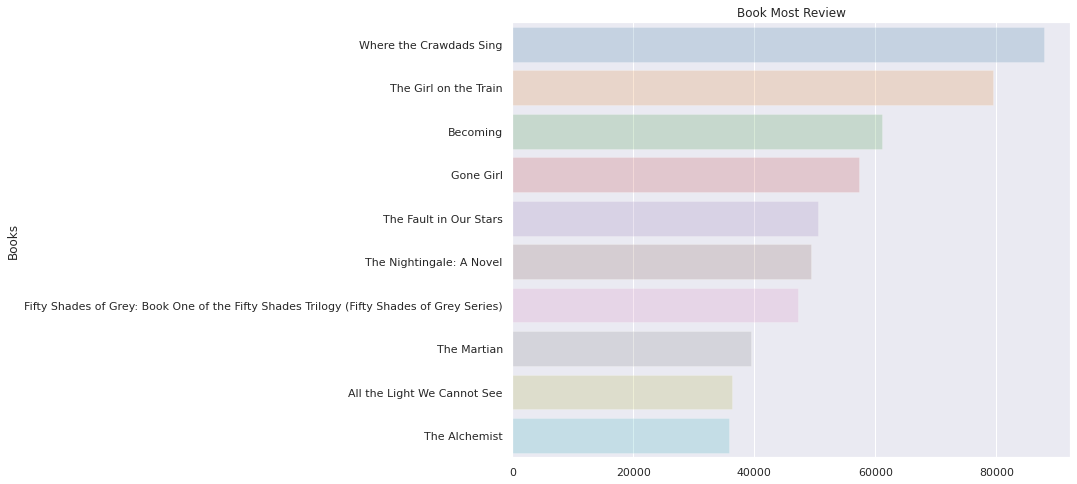

In [45]:
x = best_rev['Name']
y = best_rev['Reviews']

sns.set_theme(style='darkgrid')
fig = plt.figure(figsize=(10,8))
sns.barplot(x=y, y=x, palette='tab10', orient='h', alpha=.2)
plt.xlabel("")
plt.ylabel("Books")
plt.title("Book Most Review")
plt.show()